In [1]:
import nest_asyncio
nest_asyncio.apply()

In [34]:
import asyncio
from agents.extensions.visualization import draw_graph
import os 
from openai import AsyncOpenAI 
from dotenv import load_dotenv  
load_dotenv() 
from agents import (
    Agent,
    Runner, 
    set_tracing_disabled,OpenAIChatCompletionsModel,enable_verbose_stdout_logging
)   
 

# enable_verbose_stdout_logging() 
set_tracing_disabled(disabled=True)
API_KEY=os.getenv("GEMINI_API_KEY")

if  not API_KEY  :
    raise ValueError("Please set EXAMPLE_BASE_URL, EXAMPLE_API_KEY, EXAMPLE_MODEL_NAME via env var or code.")

 
client = AsyncOpenAI(base_url="https://generativelanguage.googleapis.com/v1beta/openai/",api_key=API_KEY,)

model = OpenAIChatCompletionsModel(model="gemini-2.0-flash",openai_client=client)



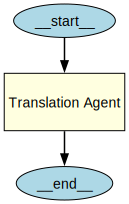

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Setting current trace: no-op
Setting current trace: no-op
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x0000016EE29B4D20>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x0000016EE29B4D20>
Running agent Translation Agent (turn 1)
Running agent Translation Agent (turn 1)
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x0000016EE2779070>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x0000016EE2779070>
[
  {
    "content": "You are a professional translator. Translate the user's input text into Urdu.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is AI"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a professiona

In [35]:
from agents import Agent
from agents.extensions.visualization import draw_graph
from IPython.display import display
 
# Visualize the pipeline
async def main(input_value):
    
 
    
    translation_agent = Agent(
        name="Translation Agent",
        instructions=(
            "You are a professional translator. "
            "Translate the user's input text into Urdu."
        ),
             
        model=model
    )

    display(draw_graph(translation_agent))
    resp = await Runner.run(translation_agent,input_value)
    print(resp.final_output)

if __name__=="__main__":
    asyncio.run(main("what is AI"))   
